Importar librerías

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

## Método de Bisección de Bolzano

In [100]:
def biseccion(f, a, b, N):
    # Si los signos son iguales, quiere decir que no hay una raíz en el
    # intervalo
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("El intervalo no contiene una raíz")
    
    # El algoritmo se ejecuta iterativamente N veces
    for n in range(N):
        # Se calcula el punto medio del intervalo [a,b]
        c = (a + b)/2

        # Caso 1: Si f(a) y f(c) tienen signos iguales, quiere decir que
        # hay un cero en el intervalo [c, b]
        if np.sign(f(a)) == np.sign(f(c)):
            # Se hace a = c para que en la siguiente iteración se tome el
            # intervalo [c, b]
            a = c
            # b_1 = b_0
            b = b
        # Caso 2: Si f(b) y f(c) tienen signos iguales, quiere decir que
        # hay un cero en el intervalo [a, c]
        elif np.sign(f(b)) == np.sign(f(c)):
            # a_1 = a_0
            a = a
            # Se hace b = c para que en la siguiente iteración se tome el
            # intervalo [a, c]
            b = c
        # Caso 3: Si f(c) = 0, entonces se encontró la solución a la ecuación,
        # por lo que se retorna inmediatamente c
        elif f(c) == 0:
            print("Solución encontrada después de {0} iteraciones:".format(n))
            return c
        # Si no se cumple ninguna de las condiciones, quiere decir que algo
        # falló
        else:
            raise Exception("Algo falló")
    # Al finalizar las N iteraciones, se retorna la aproximación de la solución
    print("Solución aproximada:")
    return (a + b)/2

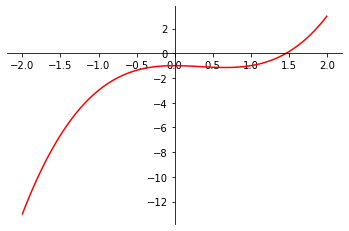

In [102]:
# Código tomado y modificado de: https://scriptverse.academy/tutorials/python-matplotlib-plot-function.html
# para la gráfica de una función

# 100 linearly spaced numbers
x = np.linspace(-2,2,100)

# the function, which is y = x^2 here
y = x**3 - x**2 - 1

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

In [101]:
# f(x) = x^2 - x - 1
f = lambda x: x**3 - x**2 - 1

print("5 iteraciones en [1, 2]:")
print(biseccion(f, 1, 2, 5))

print("---------------------")

print("50 iteraciones en [1, 2]:")
print(biseccion(f, 1, 2, 50))

5 iteraciones en [1, 2]:
Solución aproximada:
1.453125
---------------------
50 iteraciones en [1, 2]:
Solución aproximada:
1.4655712318767677


## Método de la Secante

In [42]:
def secante(f, x0, x1, N):
    # El algoritmo se ejecuta iterativamente N veces
    for n in range(N):
        # Si f(x1) = f(x2), quiere decir que ya se llegó a una solución
        # (y para evitar la división sobre cero)
        if f(x1) == f(x0):
            print("Solución encontrada después de {0} iteraciones:".format(n))
            return x1
        # Se calcula la aproximación a la raíz
        x2 = x1 - f(x1) * (x1 - x0) / float(f(x1) - f(x0))
        # Se reasignan las variables para la siguiente iteración
        x0 = x1
        x1 = x2
        # Si f(x1) = 0, entonces se encontró la solución a la ecuación,
        # por lo que se retorna inmediatamente c
        if f(x1) == 0:
            print("Solución encontrada después de {0} iteraciones:".format(n))
            return x1
    # Al finalizar las N iteraciones, se retorna la aproximación de la solución
    print("Solución aproximada:")
    return x1

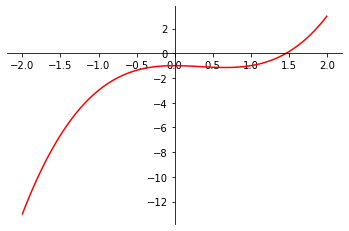

In [ ]:
# Código tomado y modificado de: https://scriptverse.academy/tutorials/python-matplotlib-plot-function.html
# para la gráfica de una función

# 100 linearly spaced numbers
x = np.linspace(-2,2,100)

# the function, which is y = x^2 here
y = x**3 - x**2 - 1

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

In [45]:
# f(x) = x^3 - x^2 - 1
g = lambda x: x**3 - x**2 - 1

print("20 iteraciones en [1, 2] (intervalo que contiene la raíz):")
print(secante(g, 1, 2, 20))

print("--------------------")

print("50 iteraciones en [2, 3] (intervalo que NO contiene la raíz):")
print(secante(g, 2, 3, 50))

20 iteraciones en [1, 2] (intervalo que contiene la raíz):
Solución encontrada después de 10 iteraciones:
1.4655712318767682
--------------------
50 iteraciones en [2, 3] (intervalo que NO contiene la raíz):
Solución encontrada después de 11 iteraciones:
1.4655712318767682


## Método de Newton-Raphson

In [95]:
def newtonRaphson(x, f, df, N, tol = 1e-15):
    # Si la derivada evaluada en x es 0, quiere decir que algo falló
    if df(x) == 0:
        raise Exception("La derivada de la función en x es 0. Algo falló.")

    # El algoritmo se ejecuta iterativamente N veces
    for n in range(N):
        # Se calcula la aproximación lineal
        x = x - f(x)/df(x)
        # Si la solución no converge exactamente a la raíz, entonces se
        # proporciona un rango de tolerancia
        if abs(f(x)) < tol:
            print("Solución encontrada después de {0} iteraciones:".format(n))
            return x - f(x)/df(x)
    # Al finalizar las N iteraciones, se retorna la aproximación de la solución
    print("La solución aproximada es:")
    return x - f(x)/df(x)

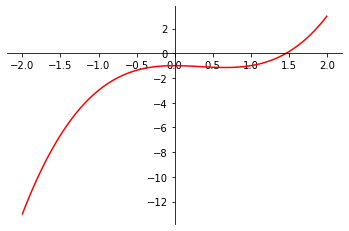

In [99]:
# Código tomado y modificado de: https://scriptverse.academy/tutorials/python-matplotlib-plot-function.html
# para la gráfica de una función

# 100 linearly spaced numbers
x = np.linspace(-2,2,100)

# the function, which is y = x^2 here
y = x**3 - x**2 - 1

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

In [103]:
x = Symbol('x')

# f(x) = x^3 - x^2 - 1
h = x**3 - x**2 - 1

# Se calcula la derivada de la función
dh = lambdify(x, h.diff(x))
h = lambdify(x, h)

print("Estimación inicial x0 = 2 con 15 iteraciones")
print(newtonRaphson(2, h, dh, 15))

print("-------------------------")
print("Estimación inicial x0 = 3 con 3 iteraciones")
print(newtonRaphson(3, h, dh, 3))

Estimación inicial x0 = 2 con 15 iteraciones
Solución encontrada después de 5 iteraciones:
1.4655712318767682
-------------------------
Estimación inicial x0 = 3 con 3 iteraciones
La solución aproximada es:
1.4675376279341459
